In [1]:
# Importing libraries :
import pandas as pd                                    
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm     
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import pandas_datareader as pdr
import datetime as dt

import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Initial and final date to retrieve data in between
start = dt.datetime(2019, 1, 1)
end = dt.datetime(2022, 6, 30)

In [3]:
# Extracting data from yahoo finance website
df = pdr.get_data_yahoo("^NSEI", start,end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,10895.349609,10735.049805,10868.849609,10792.500000,309700.0,10792.500000
2019-01-03,10814.049805,10661.250000,10796.799805,10672.250000,286200.0,10672.250000
2019-01-04,10741.049805,10628.650391,10699.700195,10727.349609,296600.0,10727.349609
2019-01-07,10835.950195,10750.150391,10804.849609,10771.799805,269400.0,10771.799805
2019-01-08,10818.450195,10733.250000,10786.250000,10802.150391,277700.0,10802.150391


In [4]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-06-24,15749.250000,15619.450195,15657.400391,15699.250000,219600.0,15699.250000
2022-06-27,15927.450195,15815.500000,15926.200195,15832.049805,210900.0,15832.049805
2022-06-28,15892.099609,15710.150391,15757.450195,15850.200195,251900.0,15850.200195
2022-06-29,15861.599609,15687.799805,15701.700195,15799.099609,444900.0,15799.099609
2022-06-30,15890.000000,15728.849609,15774.500000,15780.250000,306000.0,15780.250000


In [5]:
df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,862.000000,862.000000,862.000000,862.000000,8.620000e+02,862.000000
mean,13539.284276,13361.593549,13465.294428,13452.673496,4.878099e+05,13452.673496
std,2733.919454,2723.966746,2731.581670,2731.106364,2.240275e+05,2731.106364
min,8036.950195,7511.100098,7735.149902,7610.250000,0.000000e+00,7610.250000
25%,11363.737793,11240.174805,11322.250000,11301.350098,3.064750e+05,11301.350098
50%,12224.549805,12125.349609,12173.725098,12169.149902,4.646000e+05,12169.149902
75%,15924.500244,15778.575195,15871.100342,15855.524902,6.222250e+05,15855.524902
max,18604.449219,18445.300781,18602.349609,18477.050781,1.811000e+06,18477.050781


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 862 entries, 2019-01-02 to 2022-06-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       862 non-null    float64
 1   Low        862 non-null    float64
 2   Open       862 non-null    float64
 3   Close      862 non-null    float64
 4   Volume     862 non-null    float64
 5   Adj Close  862 non-null    float64
dtypes: float64(6)
memory usage: 47.1 KB


In [7]:
df.index              

DatetimeIndex(['2019-01-02', '2019-01-03', '2019-01-04', '2019-01-07',
               '2019-01-08', '2019-01-09', '2019-01-10', '2019-01-11',
               '2019-01-14', '2019-01-15',
               ...
               '2022-06-17', '2022-06-20', '2022-06-21', '2022-06-22',
               '2022-06-23', '2022-06-24', '2022-06-27', '2022-06-28',
               '2022-06-29', '2022-06-30'],
              dtype='datetime64[ns]', name='Date', length=862, freq=None)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 862 entries, 2019-01-02 to 2022-06-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       862 non-null    float64
 1   Low        862 non-null    float64
 2   Open       862 non-null    float64
 3   Close      862 non-null    float64
 4   Volume     862 non-null    float64
 5   Adj Close  862 non-null    float64
dtypes: float64(6)
memory usage: 47.1 KB


In [9]:
data=df[['Adj Close']]
data.head()

,Adj Close
Date,
2019-01-02,10792.500000
2019-01-03,10672.250000
2019-01-04,10727.349609
2019-01-07,10771.799805
2019-01-08,10802.150391


Text(0, 0.5, "Stock's Closing price")

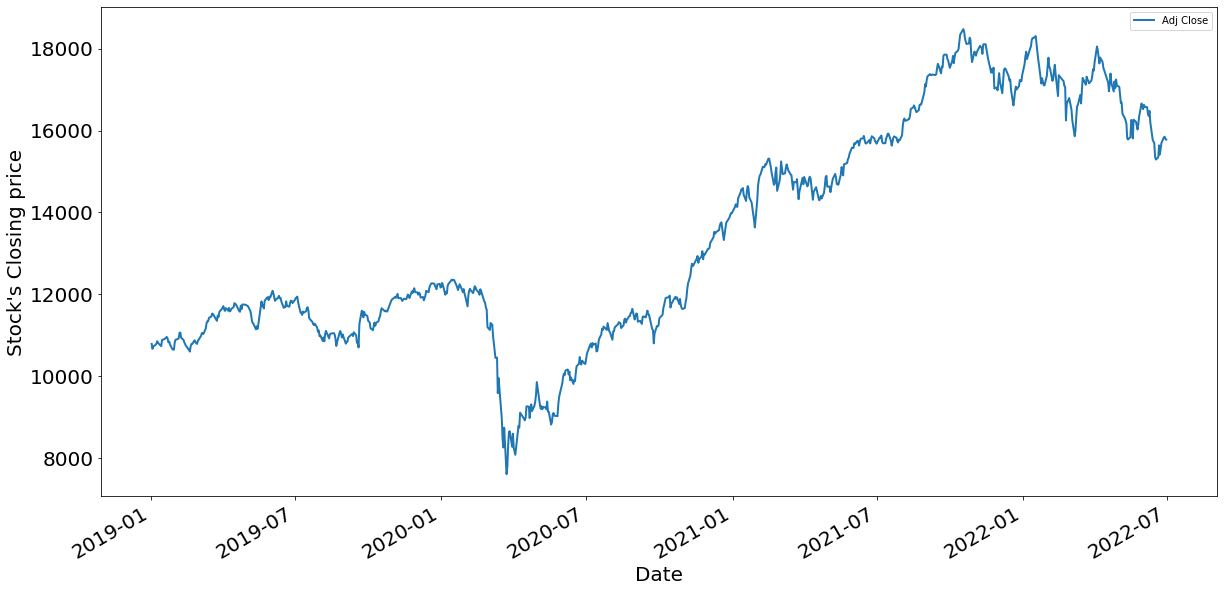

In [10]:
data.plot(figsize=(20,10), linewidth=2, fontsize=20)
plt.xlabel('Date',fontsize=20)
plt.ylabel('Stock\'s Closing price',fontsize=20)

In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Adj Close,862.0,13452.673496,2731.106364,7610.25,11301.350098,12169.149902,15855.524902,18477.050781


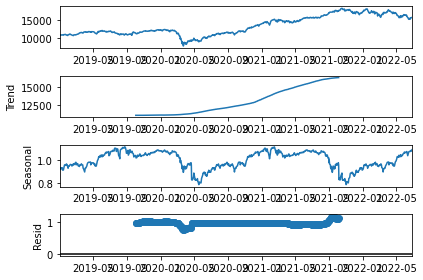

In [12]:
# Decomposition 
decomposition = sm.tsa.seasonal_decompose(data, model = 'multiplicative', period = 365)
fig = decomposition.plot()

fig.show()

In [13]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(data):
    result=adfuller(data)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [14]:
adfuller_test(data)

ADF Test Statistic : -0.9938714342067934
p-value : 0.755492986424207
#Lags Used : 6
Number of Observations Used : 855
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [15]:
# Seasonal difference
data['Seasonal First Difference']=data['Adj Close']-data['Adj Close'].shift(1)
data.head(15)

,Adj Close,Seasonal First Difference
Date,,
2019-01-02,10792.500000,NaN
2019-01-03,10672.250000,-120.250000
2019-01-04,10727.349609,55.099609
2019-01-07,10771.799805,44.450195
2019-01-08,10802.150391,30.350586
2019-01-09,10855.150391,53.000000
2019-01-10,10821.599609,-33.550781
2019-01-11,10794.950195,-26.649414
2019-01-14,10737.599609,-57.350586


In [16]:
## Again test dickey fuller test
adfuller_test(data['Seasonal First Difference'].dropna())

ADF Test Statistic : -11.222273143461011
p-value : 1.9998633555326225e-20
#Lags Used : 5
Number of Observations Used : 855
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<AxesSubplot:xlabel='Date'>

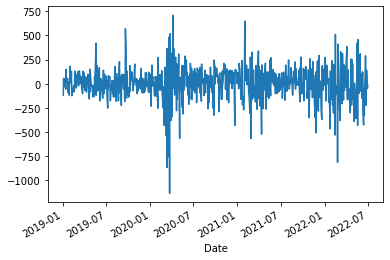

In [17]:
data['Seasonal First Difference'].plot()

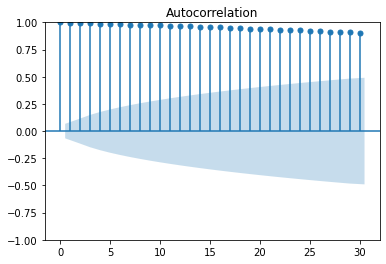

In [18]:
plot_acf(data['Adj Close'])
plt.show()

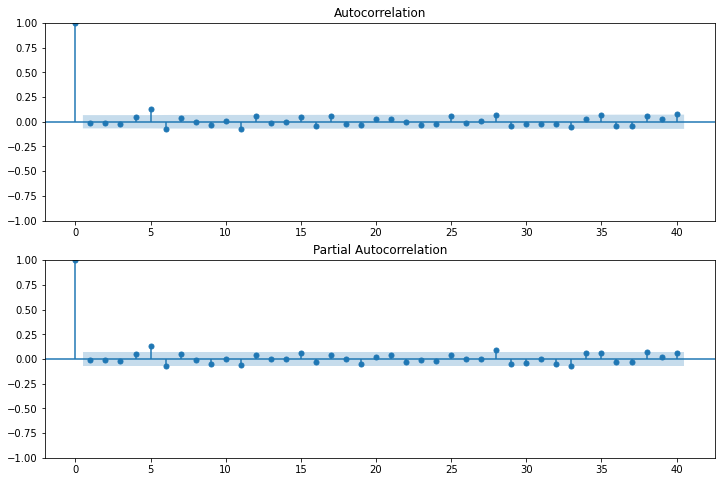

In [19]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

In [20]:
# ACF graph tell the order of MV . Here, x axis represents time period nd y axis  represents correlation . 
#Value of only time period 5 is much greater than the others which means its lags are relavent, making it the 1 order MV.
# We do not consider the values of other time period because they are much less and statistical insignificant.

# PACF graph tells the order of AR . the value of 5 and 28 time period is greater than others which means the lags are relavent .
# Making it a 2nd order of AR.

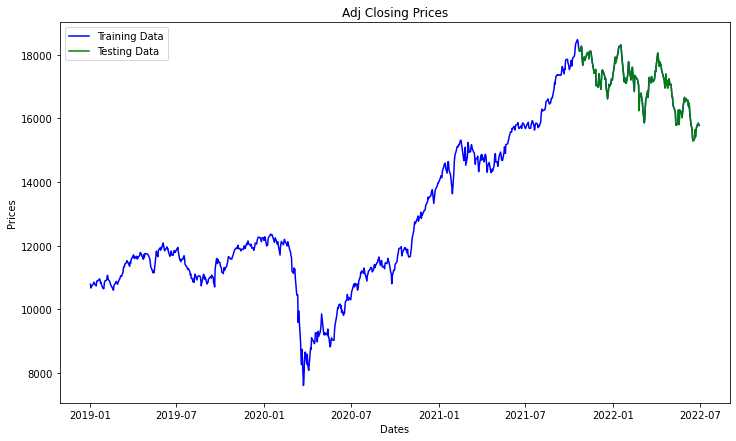

In [21]:
train_data, test_data = data[0:int(len(data)*0.8)], data[int(len(data)*0.8):]
plt.figure(figsize=(12,7))
plt.title('Adj Closing Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(data['Adj Close'], 'blue', label='Training Data')
plt.plot(test_data['Adj Close'], 'green', label='Testing Data')
plt.legend()

In [22]:
def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))

train_ar = train_data['Adj Close'].values
test_ar = test_data['Adj Close'].values

history = [x for x in train_ar]
print(type(history))
predictions = list()
for t in range(len(test_ar)):
    model = sm.tsa.arima.ARIMA(history, order=(5,1,2))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
error = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: %.3f' % error)
error2 = smape_kun(test_ar, predictions)
print('Symmetric mean absolute percentage error: %.3f' % error2)

<class 'list'>
Testing Mean Squared Error: 45744.725
Symmetric mean absolute percentage error: 0.979


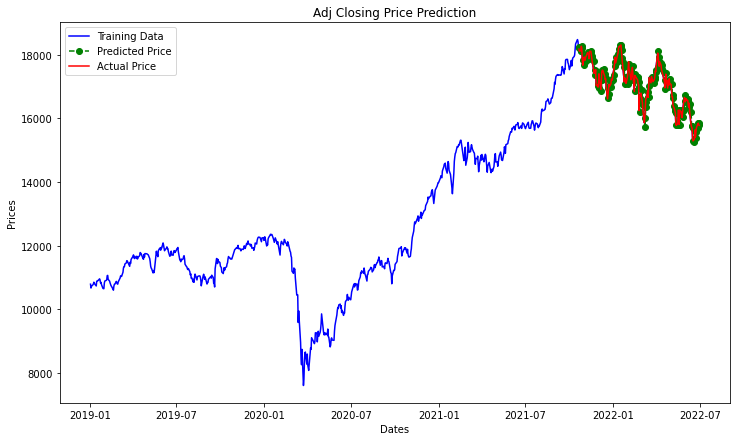

In [23]:
plt.figure(figsize=(12,7))
plt.plot(data['Adj Close'],'green', color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Adj Close'], color='red', label='Actual Price')
plt.title('Adj Closing Price Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

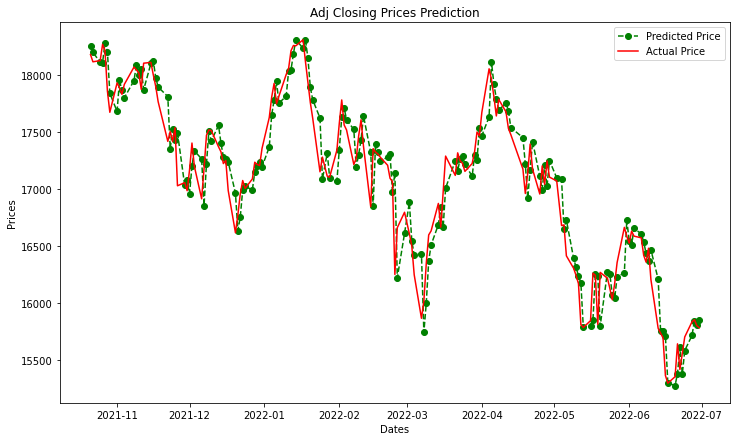

In [24]:
plt.figure(figsize=(12,7))
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Adj Close'], color='red', label='Actual Price')
plt.title('Adj Closing Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

In [25]:
actual=pd.DataFrame()
actual=pd.DataFrame(test_ar,columns=["Actual"])
predicted=pd.DataFrame(list(predictions),columns=["Predicted"])
actual=actual.reset_index(drop=True)
predicted=predicted.reset_index(drop=True)
output=pd.concat([actual,predicted],axis=1)
print(output.head(10))

         Actual     Predicted
0  18178.099609  18252.238601
1  18114.900391  18199.687090
2  18125.400391  18108.910139
3  18268.400391  18107.552816
4  18210.949219  18281.355538
5  17857.250000  18203.085989
6  17671.650391  17838.736074
7  17929.650391  17679.010363
8  17888.949219  17951.249765
9  17829.199219  17863.834599


In [26]:
from prophet import Prophet

In [27]:
model = Prophet()

In [28]:
df = data[['Adj Close']]

In [29]:
df = df.reset_index()

In [30]:
df.head()

,Date,Adj Close
0,2019-01-02,10792.500000
1,2019-01-03,10672.250000
2,2019-01-04,10727.349609
3,2019-01-07,10771.799805
4,2019-01-08,10802.150391


In [31]:
df.rename(columns={'Date':'ds'},inplace=True)

In [32]:
df.rename(columns={'Adj Close':'y'},inplace=True)

In [33]:
df.head()

,ds,y
0,2019-01-02,10792.500000
1,2019-01-03,10672.250000
2,2019-01-04,10727.349609
3,2019-01-07,10771.799805
4,2019-01-08,10802.150391


In [34]:
m = model.fit(df) #fit the dataframe into (prophet)model

21:58:12 - cmdstanpy - INFO - Chain [1] start processing
21:58:12 - cmdstanpy - INFO - Chain [1] done processing


In [35]:
future = m.make_future_dataframe(periods = 500, freq = 'D') #make future datframe for forecasting

In [36]:
future.head()

,ds
0,2019-01-02
1,2019-01-03
2,2019-01-04
3,2019-01-07
4,2019-01-08


In [37]:
future.shape #this is our final data use for forecasting, evaluation , cross-validiation

(1362, 1)

In [38]:
forecast = m.predict(future)

In [39]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-01-02,10025.555369,9898.710688,10892.567891,10025.555369,10025.555369,405.810723,405.810723,405.810723,-117.210561,-117.210561,-117.210561,523.021284,523.021284,523.021284,0.0,0.0,0.0,10431.366092
1,2019-01-03,10041.325930,9960.432421,10965.331226,10041.325930,10041.325930,422.804151,422.804151,422.804151,-134.999061,-134.999061,-134.999061,557.803212,557.803212,557.803212,0.0,0.0,0.0,10464.130081
2,2019-01-04,10057.096491,10006.437234,11005.822226,10057.096491,10057.096491,431.773734,431.773734,431.773734,-158.674698,-158.674698,-158.674698,590.448432,590.448432,590.448432,0.0,0.0,0.0,10488.870225
3,2019-01-07,10104.408175,10103.510800,11108.121165,10104.408175,10104.408175,512.690058,512.690058,512.690058,-159.164951,-159.164951,-159.164951,671.855009,671.855009,671.855009,0.0,0.0,0.0,10617.098233
4,2019-01-08,10120.178737,10186.224907,11123.524866,10120.178737,10120.178737,559.983851,559.983851,559.983851,-132.545563,-132.545563,-132.545563,692.529414,692.529414,692.529414,0.0,0.0,0.0,10680.162588


In [40]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10) #1.yhat(closing price), 2.yhat_lower(lower bound), 

,ds,yhat,yhat_lower,yhat_upper
1352,2023-11-03,13036.466680,4782.594464,21167.363184
1353,2023-11-04,13543.463978,5564.266107,21752.275936
1354,2023-11-05,13540.499853,5193.538952,21728.519067
1355,2023-11-06,13027.194387,4962.594526,21248.485775
1356,2023-11-07,13051.197588,5025.026394,21344.968591
1357,2023-11-08,13064.239993,4744.504165,21566.101662
1358,2023-11-09,13044.565942,4795.557513,21113.731854
1359,2023-11-10,13019.478147,4576.092443,21060.629882
1360,2023-11-11,13528.557327,5134.123184,21793.749586
1361,2023-11-12,13528.206298,5205.504018,21916.823181


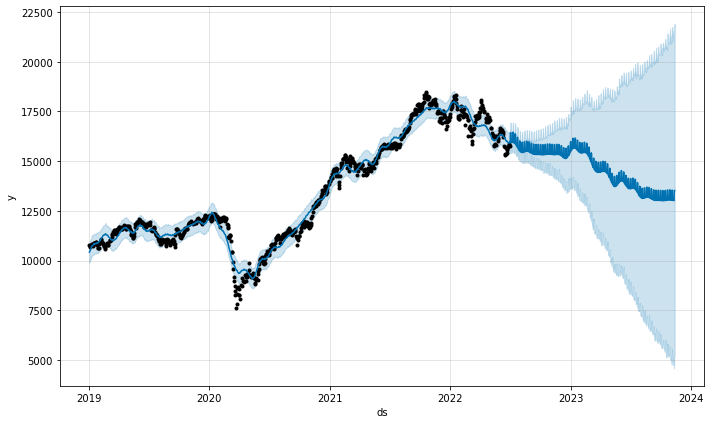

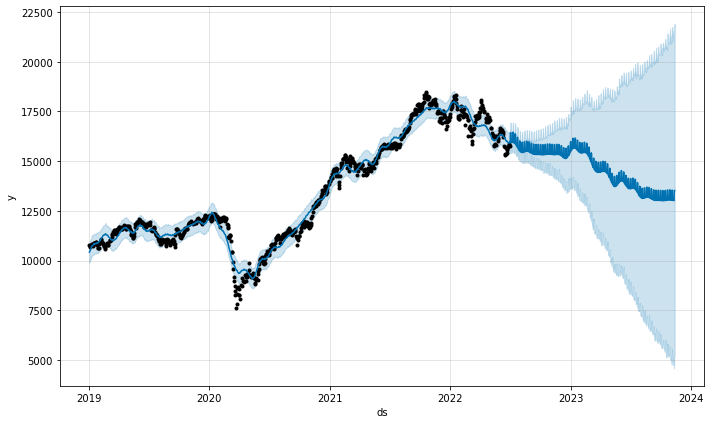

In [41]:
model.plot(forecast)

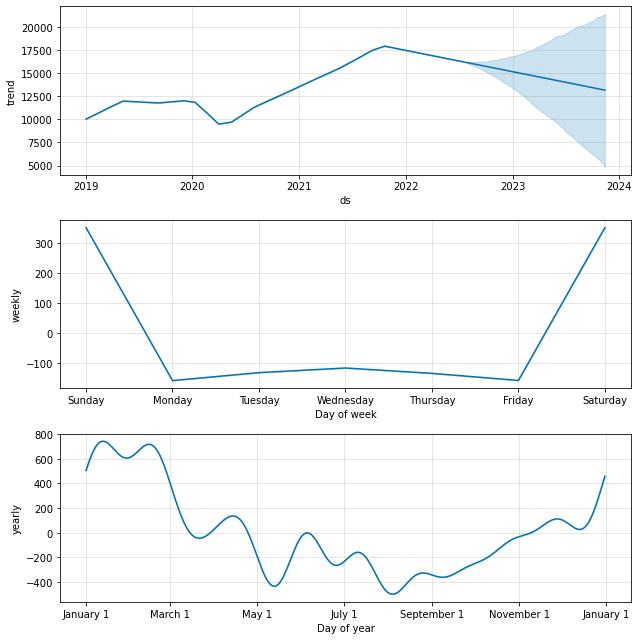

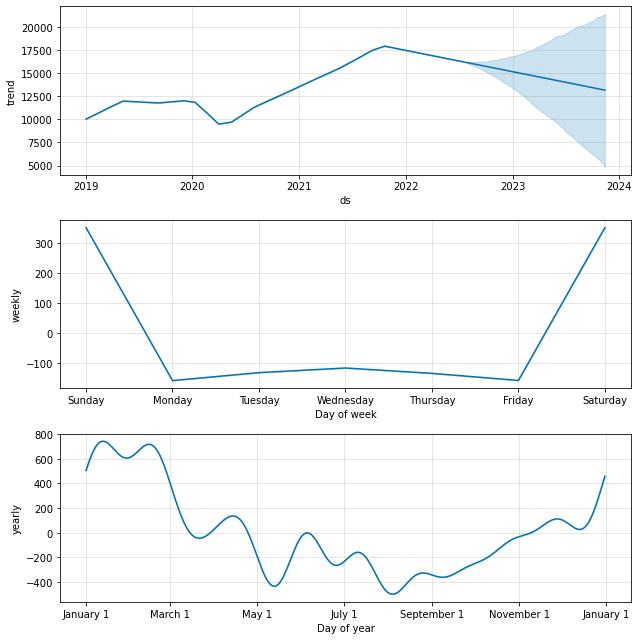

In [42]:
#now check trend component on weekly or yearly basis
model.plot_components(forecast)

In [44]:
from prophet.diagnostics import cross_validation

In [45]:
df_cv = cross_validation(model,horizon='200 days',period='100 days',initial='600 days') #horizon = forecast horizon, period = spacing between cutoffs, initial = training data size

  0%|          | 0/5 [00:00<?, ?it/s]

22:10:45 - cmdstanpy - INFO - Chain [1] start processing
22:10:45 - cmdstanpy - INFO - Chain [1] done processing
22:10:46 - cmdstanpy - INFO - Chain [1] start processing
22:10:46 - cmdstanpy - INFO - Chain [1] done processing
22:10:46 - cmdstanpy - INFO - Chain [1] start processing
22:10:47 - cmdstanpy - INFO - Chain [1] done processing
22:10:47 - cmdstanpy - INFO - Chain [1] start processing
22:10:47 - cmdstanpy - INFO - Chain [1] done processing
22:10:48 - cmdstanpy - INFO - Chain [1] start processing
22:10:48 - cmdstanpy - INFO - Chain [1] done processing


In [46]:
df_cv.shape

(678, 6)

In [47]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-11-09,12138.573692,11782.565890,12483.024334,12461.049805,2020-11-07
1,2020-11-10,12162.001151,11823.831794,12534.418577,12631.099609,2020-11-07
2,2020-11-11,12195.600723,11856.674720,12549.545566,12749.150391,2020-11-07
3,2020-11-12,12210.324685,11867.303178,12555.388957,12690.799805,2020-11-07
4,2020-11-13,12225.143740,11880.011760,12579.448088,12719.950195,2020-11-07


In [50]:
from prophet.plot import plot_cross_validation_metric

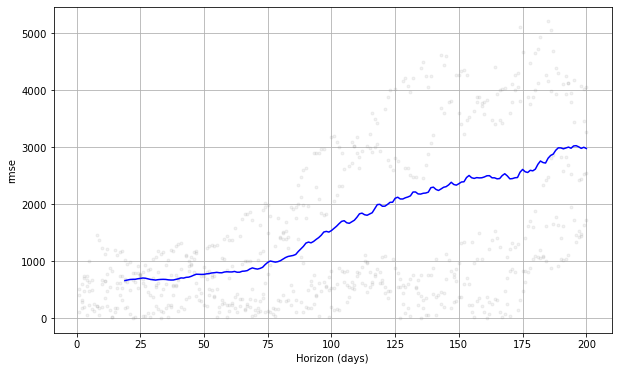

In [51]:
fig = plot_cross_validation_metric(df_cv,metric='rmse')

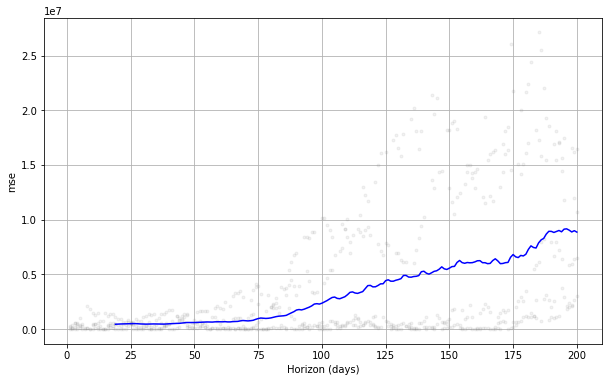

In [52]:
fig = plot_cross_validation_metric(df_cv,metric='mse')

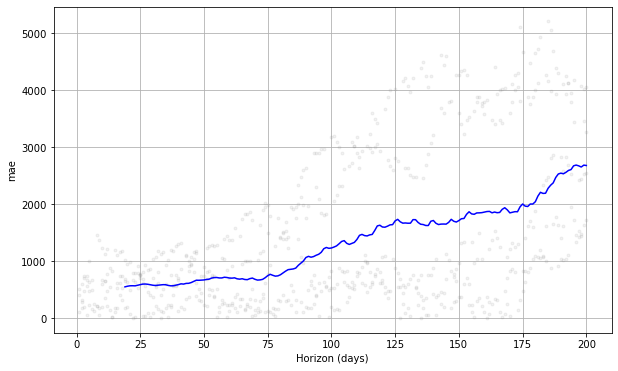

In [53]:
fig = plot_cross_validation_metric(df_cv,metric='mae')

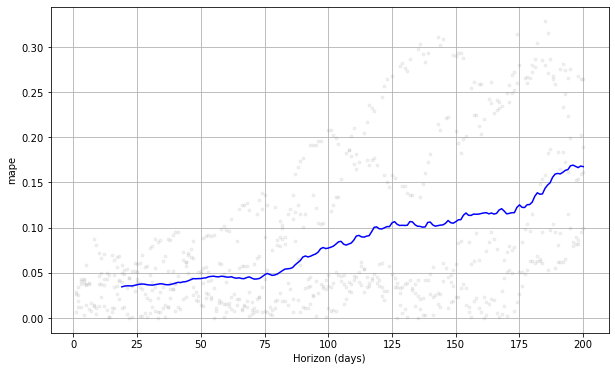

In [54]:
fig = plot_cross_validation_metric(df_cv,metric='mape')